<a href="https://colab.research.google.com/github/ArathySatheesh/Machine_Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.image as mpimg

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Looking at random images in the dataset.Since, the images are small, they are scaled to view properly.

In [ ]:
for i in range(0,6):
  random_num=np.random.randint(0,len(x_train))
  img=x_train[random_num]
  img_scaled=cv2.resize(img,None,fx=5,fy=5,interpolation=cv2.INTER_NEAREST)
  cv2_imshow(img_scaled)
  cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
img_rows=x_train[0].shape[0]

In [ ]:
img_cols=x_train[0].shape[1]

Reshaping for Keras as 4D

In [ ]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

Storing the shape of a single image

In [ ]:
input_shape=(img_rows,img_cols,1)
num_classes=10

Keras works with float

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

Normalise from (0 to 255) to (0 to 1)

In [ ]:
x_train/=255.0
x_test/=255.0

In [ ]:
print('X_train shape:', x_train.shape)
print(x_train.shape[0], 'Train samples')
print(x_test.shape[0], 'Test samples')

X_train shape: (60000, 28, 28, 1)
60000 Train samples
10000 Test samples


One hot encoding for labels

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

In [ ]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))

In [ ]:
model.add(Dropout(0.50))

In [ ]:
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
batch_size=32
epochs=10

In [ ]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 174s 92ms/step - loss: 0.5890 - accuracy: 0.8146 - val_loss: 0.2036 - val_accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2951 - accuracy: 0.9117 - val_loss: 0.1466 - val_accuracy: 0.9564
Epoch 3/10
1875/1875 [==============================] - 167s 89ms/step - loss: 0.2198 - accuracy: 0.9336 - val_loss: 0.1086 - val_accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 170s 90ms/step - loss: 0.1758 - accuracy: 0.9473 - val_loss: 0.0823 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1441 - accuracy: 0.9560 - val_loss: 0.0727 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1236 - accuracy: 0.9628 - val_loss: 0.0662 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 168s 90ms/step - loss: 0.1125 - accuracy: 0.9659 - val_loss: 0

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)

In [ ]:
score

[0.043129175901412964, 0.9861000180244446]

In [ ]:
print("Test Loss : ", score[0])
print("Test Accuracy:",score[1])

Test Loss :  0.043129175901412964
Test Accuracy: 0.9861000180244446


Plotting Loss Chart

In [52]:
print(history.history.keys())



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# summarize history for accuracy

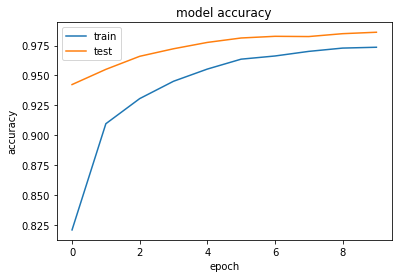

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

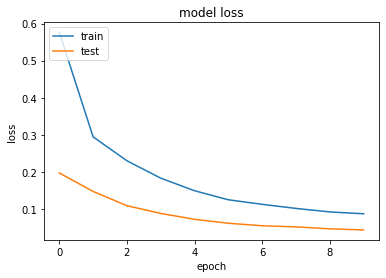

In [54]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()